In [304]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "C:\\Users\\JMadd\\Desktop\\Homework\\05-Matplotlib\\Instructions\\Pymaceuticals\\data\\mouse_drug_data.csv"
clinical_trial_data_to_load = "C:\\Users\\JMadd\Desktop\\Homework\\05-Matplotlib\\Instructions\\Pymaceuticals\\data\\clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trials_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset

df = pd.merge(mouse_drug_df, clinical_trials_df, on="Mouse ID")
# Display the data table for preview
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [305]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Group1 = df.groupby(["Drug", "Timepoint"])

Mean_Tumor_Volume = Group1["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
Tumor_Volume_Data = pd.DataFrame(Mean_Tumor_Volume).reset_index()

# Preview DataFrame
Tumor_Volume_Data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [338]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

Standard_Mean_Error = Group1["Tumor Volume (mm3)"].sem()


# Convert to DataFrame
df2 = pd.DataFrame(Standard_Mean_Error).reset_index()

# Preview DataFrame
df2.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [339]:
# Minor Data Munging to Re-Format the Data Frames
MData1 = Tumor_Volume_Data.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')


# Preview that Reformatting worked
MData1

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


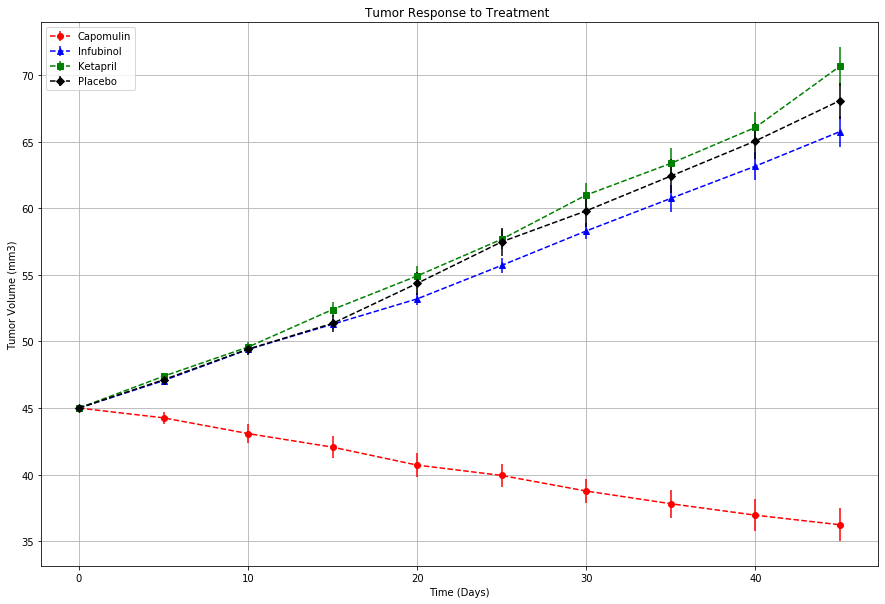

In [340]:
# Generate the Plot (with Error Bars)
#Set plot size
plt.figure(figsize=(15,10)) 

#Set Time Values
x_axis = (0, 5, 10, 15, 20, 25, 30, 35, 40, 45)

#Grab Standard errors
Capomulin_error = df2.loc[df2['Drug'] == 'Capomulin', 'Tumor Volume (mm3)']
Infubinol_error = df2.loc[df2['Drug'] == 'Infubinol', 'Tumor Volume (mm3)']
Ketapril_error = df2.loc[df2['Drug'] == 'Ketapril', 'Tumor Volume (mm3)']
Placebo_error = df2.loc[df2['Drug'] == 'Placebo', 'Tumor Volume (mm3)']

#Plot Data
plt.errorbar(x_axis, MData1['Capomulin'] , yerr= Capomulin_error, label= 'Capomulin', marker= 'o', color='red', linestyle='--')
plt.errorbar(x_axis, MData1['Infubinol'] , yerr= Infubinol_error, label= 'Infubinol', marker= '^', color='blue', linestyle='--')
plt.errorbar(x_axis, MData1['Ketapril'] , yerr= Ketapril_error, label= 'Ketapril', marker= 's', color='green', linestyle='--')
plt.errorbar(x_axis, MData1['Placebo'] ,  yerr= Placebo_error , label= 'Placebo', marker= 'D', color='black', linestyle='--')



#Aesthetics
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment ')
plt.legend()
plt.grid()
# Save the Figure
plt.savefig('TumorTreatment.png')


In [309]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [375]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

Group2 = df.groupby(['Drug', 'Timepoint'])


Mean_Meta_Data =Group2['Metastatic Sites'].mean()
# Convert to DataFrame

MData2= pd.DataFrame(Mean_Meta_Data).reset_index()

# Preview DataFrame

MData2.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [376]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Standard_Meta_Error = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
df3 = pd.DataFrame(Standard_Meta_Error).reset_index()

# Preview DataFrame
df3.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [389]:
# Minor Data Munging to Re-Format the Data Frames
MData3 = MData2.pivot(index = 'Timepoint', columns ='Drug', values = 'Metastatic Sites')
# Preview that Reformatting worked
MData3.head()

# Convert to DataFrame
MData3 = pd.DataFrame(Mean_Meta_Data).reset_index()

# Preview DataFrame
MData3.head()
# Preview that Reformatting worked



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


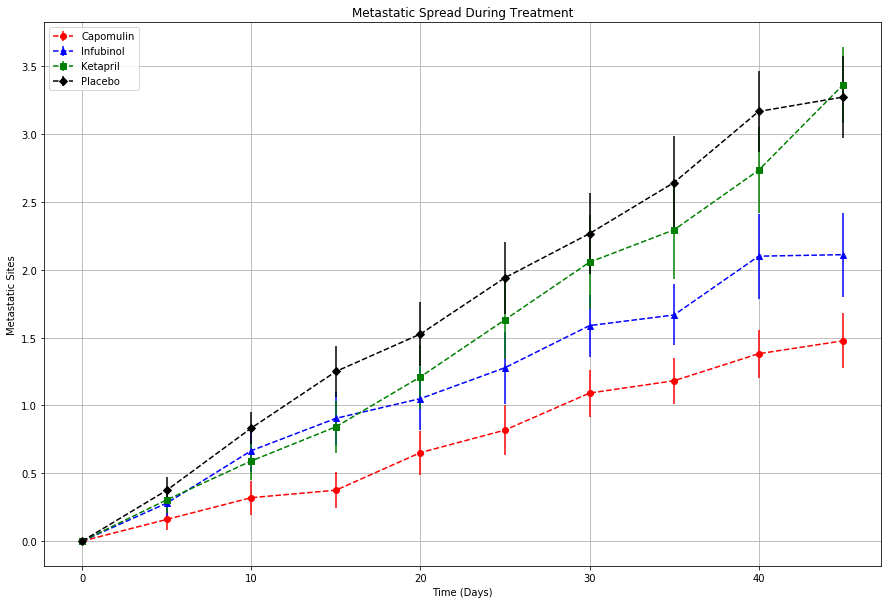

In [385]:
# Generate the Plot (with Error Bars)

#Set plot size
plt.figure(figsize=(15,10)) 

#Set Time Values
x_axis = (0, 5, 10, 15, 20, 25, 30, 35, 40, 45)

#Grab Standard errors
Capomulin_error = df3.loc[df3['Drug'] == 'Capomulin', 'Metastatic Sites']
Infubinol_error = df3.loc[df3['Drug'] == 'Infubinol', 'Metastatic Sites']
Ketapril_error = df3.loc[df3['Drug'] == 'Ketapril', 'Metastatic Sites']
Placebo_error = df3.loc[df3['Drug'] == 'Placebo', 'Metastatic Sites']

#Plot Data
plt.errorbar(x_axis, MData3['Capomulin'] , yerr= Capomulin_error, label= 'Capomulin', marker= 'o', color='red', linestyle='--')
plt.errorbar(x_axis, MData3['Infubinol'] , yerr= Infubinol_error, label= 'Infubinol', marker= '^', color='blue', linestyle='--')
plt.errorbar(x_axis, MData3['Ketapril'] , yerr= Ketapril_error, label= 'Ketapril', marker= 's', color='green', linestyle='--')
plt.errorbar(x_axis, MData3['Placebo'] , yerr= Placebo_error , label= 'Placebo', marker= 'D', color='black', linestyle='--')


#Aesthetics
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')
plt.legend()
plt.grid()
# Save the Figure
plt.savefig('TumorTreatment.png')

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [390]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#Group3 = df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

Group3 = df.groupby(['Drug', 'Timepoint'])
Count_Mice = Group3['Mouse ID'].count()
# Convert to DataFrame
Mice_Count_Data = pd.DataFrame(Count_Mice).reset_index()
Mice_Count_Data = Mice_Count_Data.rename(columns={'Mouse ID': 'Mouse Count'})
# Preview DataFrame
Mice_Count_Data.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [370]:
# Minor Data Munging to Re-Format the Data Frames
MData3 = Mice_Count_Data.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Count')
# Preview the Data Frame
MData3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


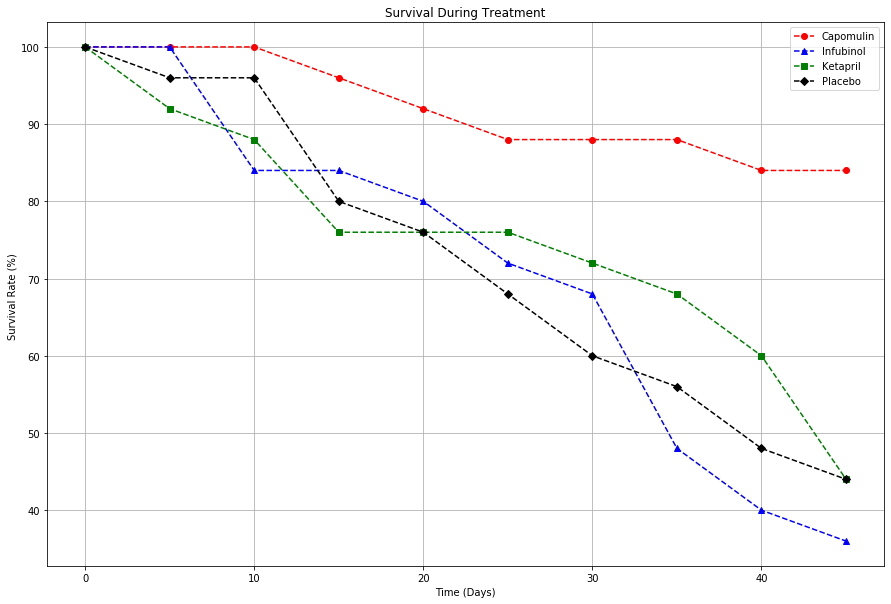

In [327]:
# Generate the Plot (Accounting for percentages)

#Set plot size
plt.figure(figsize=(15,10)) 

#Set Time Values
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

#Plot Data
#Divide by 25 is number of mice at timepoint 0. I'm still working on having it pull value from name of drug at Timepoint 0
plt.plot(Time, (MData3["Capomulin"]/25)*100 , label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.plot(Time, (MData3["Infubinol"]/25)*100 , label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.plot(Time, (MData3["Ketapril"]/25)*100 , label= "Ketapril", marker= "s", color="green", linestyle='--')
plt.plot(Time, (MData3["Placebo"]/25)*100 , label= "Placebo", marker= "D", color="black", linestyle='--')


#Aesthetics
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%) ")
plt.grid()

# Save the Figure
plt.savefig('Survival_Rate_Over_Time.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [395]:
# Calculate the percent changes for each drug


#df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

#Intial_tumor_volume = MData1['Tumor Volume (mm3)'].idxmax()
#Intial_tumor_volume = MData1.loc(MData1['Timepoint'].min())

#Drop Timepoint column
#MData1.drop(['Timepoint'], axis=1)
#MData11 = MData1.drop('Timepoint' , axis='columns')

#45 is the starting Tumor Volume at Timepoint 0.
#replace it with a variable that pulls Volume at Timepoint 0
#by drug so that running the program on any tumor size will work

Intial_tumor_volume = 45
PChange = ((MData1.loc[45, :] - Intial_tumor_volume)/Intial_tumor_volume)*100

# Display the data to confirm
PChange.head()


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Name: 45, dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [396]:
# Store all Relevant Percent Changes into a Tuple

TPChange = tuple(zip(PChange.index, PChange))

#turn into list
TPCList = list(TPChange)


In [397]:
# Splice the data between passing and failing drugs

#list for Percentage Values
drug_pass_list = []
drug_fail_list = []

#list for names of Drugs
names_pass_list = []
names_fail_list = []

#loop through lists by Percent value. 
#.append(value) adds value to drug pass/fail lists
#.append(i) adds corresponding name to index pass/fail lists
for i,value in TPCList :
    if value > 0 :
        drug_pass = value
        drug_pass_list.append(value)
        names_pass_list.append(i)
    else :
        drug_fail = value
        drug_fail_list.append(value)
        names_fail_list.append(i)

        

drugs_passing = list(zip(names_pass_list, drug_pass_list))
drug_failing = list(zip(names_fail_list, drug_fail_list))


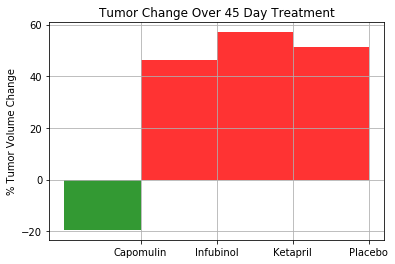

In [398]:
# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()

y_value = [PChange["Infubinol"], PChange["Ketapril"], PChange["Placebo"]]
x_axis1 = [0]
x_axis2 = [1, 2, 3]


bar1 = ax.bar(x_axis1, PChange["Capomulin"], color='g', alpha=0.8, align="edge", width = -1)
bar2 = ax.bar(x_axis2, y_value , color='r', alpha=0.8, align="edge", width = -1)
x_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

plt.setp(ax, xticks=[0, 1, 2, 3], xticklabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], yticks=[-20, 0, 20, 40, 60])


ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.grid()

In [253]:
# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, .1*height, "%d" %int(height)+ "%",
                ha='center', va='top', color="white")

In [257]:
# Call functions to implement the function calls     
autolabel(bar1)
autolabel(bar2)
fig.tight_layout()

# Save the Figure
plt.savefig("Percent_Volume_Change.png")

# Show the Figure
fig.show()

<Figure size 432x288 with 0 Axes>

![Metastatic Spread During Treatment](../Images/change.png)